### Some definitions 
* Plot
    > In literary studies, a plot refers to the sequence of events that make up the storyline of a narrative work such as a novel, play, or film. It encompasses the arrangement and interrelation of incidents, actions, and occurrences that unfold throughout the course of the narrative. The plot typically involves a beginning, middle, and end, where characters encounter challenges or conflicts, undergo developments or transformations, and ultimately reach a resolution or conclusion
* Sentiment Arc
    > The concept of a Sentiment Arc in literary studies refers to the emotional trajectory experienced by characters throughout the course of a narrative work. It involves the fluctuation and evolution of characters' feelings, attitudes, and emotional states in response to the events and experiences depicted in the plot. Although many literary works and films share similar plots, their Sentiment Arc may differs significantly.
* Emotions and Sentiments
    > Sentiment and emotion are related but distinct concepts in the realm of affective experiences. Emotion refers to brief, intense affective states triggered by specific stimuli, characterized by physiological changes and subjective feelings like happiness or fear. In contrast, sentiment encompasses broader, more enduring emotional orientations influenced by experiences, values, and cultural factors, persisting over time and shaping individuals' overall outlook or disposition. While emotions are specific and short-lived, expressed through behaviors and signals, sentiments are more general and communicated through language, symbolism, and cultural practices, reflecting deeper-seated attitudes and beliefs.
* Emotional Valence
    >  Emotional valence refers to the positive or negative quality of an emotion or affective state. It indicates whether an emotion is experienced as pleasant or unpleasant, rewarding or aversive, desirable or undesirable. In other words, emotional valence reflects the inherent "goodness" or "badness" of an emotional experience.Emotions with positive valence are those that are typically associated with feelings of happiness, joy, contentment, love, excitement, or satisfaction. These emotions are considered pleasant and are generally sought after in human experience. On the other hand, emotions with negative valence are those associated with feelings of sadness, anger, fear, disgust, anxiety, or frustration. These emotions are considered unpleasant and are typically avoided or minimized in human experience.



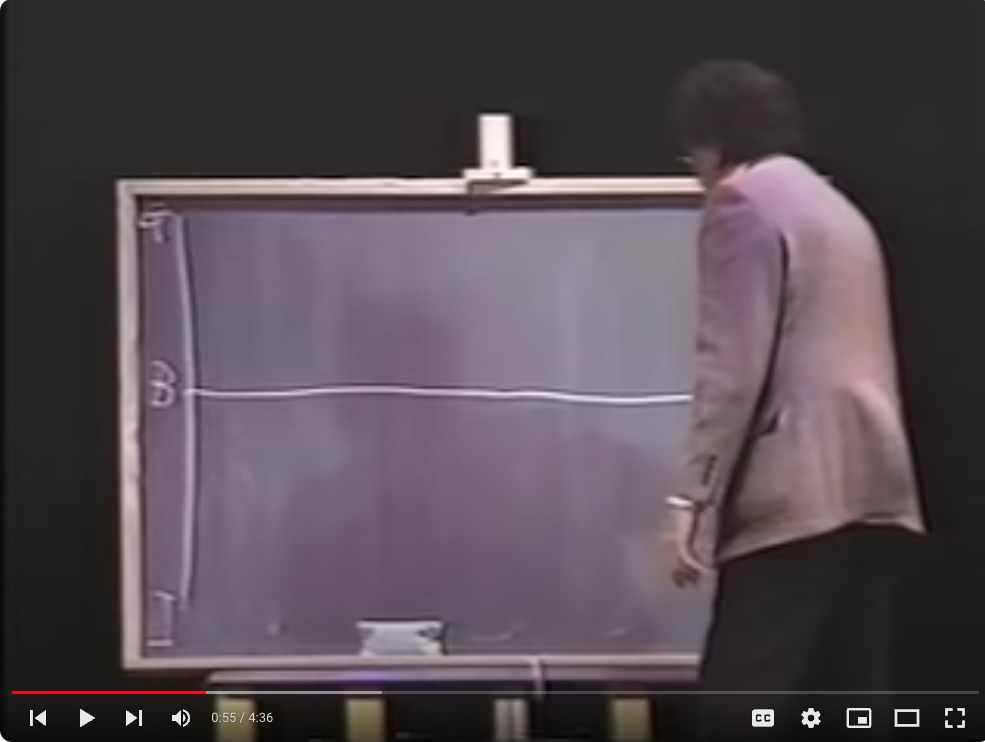

[Kurt Vonnegut on the Shapes of Stories](https://www.youtube.com/watch?v=oP3c1h8v2ZQ&list=PLcEd0IYai8aRXfTJs4vwQFg4fFCep1iWF&index=2)



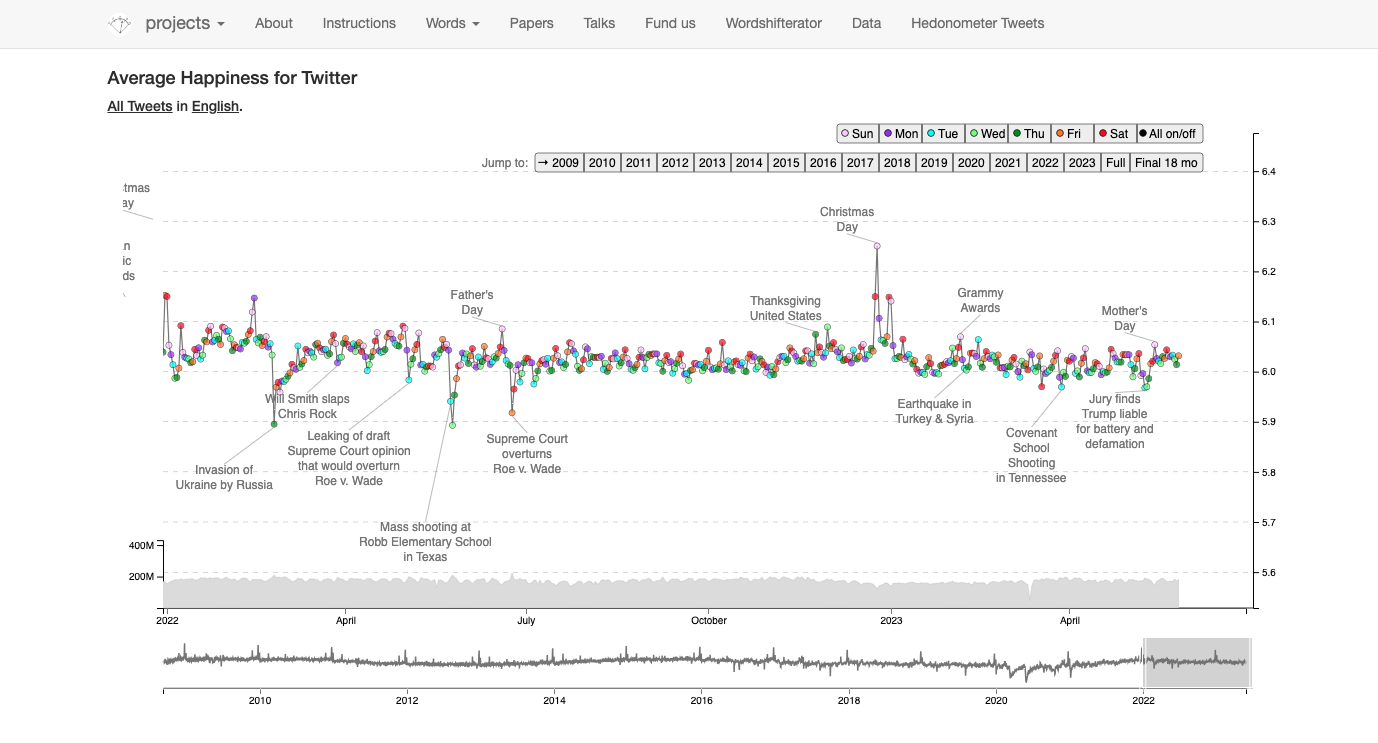
[hedonometer.org](https://hedonometer.org/timeseries/en_all/?from=2021-12-30&to=2023-06-29)

### Sentiment with Huggingface transfomers is easy. Let's give it try. 

In [ ]:
#install transformers
!pip install -q transformers

In [1]:
#load the
from transformers import pipeline



/opt/homebrew/anaconda3/envs/spacy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/anaconda3/envs/spacy/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/anaconda3/envs/spacy/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
#load the sentiment pipeline with Huggigngsface's default model
sentiment_pipeline = pipeline("sentiment-analysis")

sentence_1 = ["I love you"]
sentence_2 = ["I hate you"]



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
sentiment_pipeline(sentence_1)

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

In [4]:
sentiment_pipeline(sentence_2)

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]

### Let's try with some poems. Poems are easier to analyze since they are shorter:
  
#### I loved you; even now I may confess...  
I loved you; even now I may confess...  
I loved you; even now I may confess,  
Some embers of my love their fire retain;  
But do not let it cause you more distress,  
I do not want to sadden you again.  
Hopeless and tongue-tied, yet I loved you dearly  
With pangs the jealous and the timid know;  
So tenderly I loved you, so sincerely,  
I pray God grant another love you so.  

(Alexander Pushkin)

#### Quiet walk  
The world shifts and  
Suddenly you're by yourself  
Melancholy twirling in your heart  
Like an on and off lover  
The way it seeps in and  
Claims your day  
What can you do but feel  
And let feel  
As if you're in a shelterless rain without an umbrella  
Planning will only bring you so far  
Rather  
Claim the sadness  
Before it claims you  

(Yanamari)

In [5]:
# I am loading two poems as strings to get an idea of the over sentiment of the poems. 
poem_1 = ["I loved you; even now I may confess, Some embers of my love their fire retain; But do not let it cause you more distress, I do not want to sadden you again. Hopeless and tongue-tied, yet I loved you dearly With pangs the jealous and the timid know; So tenderly I loved you, so sincerely, I pray God grant another love you so."]

poem_2 = ["The world shifts and Suddenly you're by yourself Melancholy twirling in your heart Like an on and off lover The way it seeps in and Claims your day What can you do but feel And let feel As if you're in a shelterless rain without an umbrella Planning will only bring you so far Rather Claim the sadness Before it claims you."]

In [6]:
sentiment_pipeline(poem_1)

[{'label': 'POSITIVE', 'score': 0.9991878867149353}]

In [7]:
sentiment_pipeline(poem_2)

[{'label': 'POSITIVE', 'score': 0.9380502104759216}]

In [11]:
#Here I get another poem loaded as list in which each line is an separate item since I want to get a sentiment score per line
poem_3 = ["The world shifts and",
          "Suddenly you're by yourself",
          "Melancholy twirling in your heart",
          "Like an on and off lover",
          "The way it seeps in and",
          "Claims your day",
          "What can you do but feel",
          "And let feel",
          "As if you're in a shelterless rain without an umbrella",
          "Planning will only bring you so far",
          "Rather",
          "Claim the sadness",
          "Before it claims you"]

In [10]:
sentiment_pipeline(poem_3)

[{'label': 'POSITIVE', 'score': 0.9953124523162842},
 {'label': 'POSITIVE', 'score': 0.9978547692298889},
 {'label': 'POSITIVE', 'score': 0.8572655916213989},
 {'label': 'POSITIVE', 'score': 0.9762661457061768},
 {'label': 'POSITIVE', 'score': 0.9978474378585815},
 {'label': 'POSITIVE', 'score': 0.9995632767677307},
 {'label': 'NEGATIVE', 'score': 0.6266927123069763},
 {'label': 'NEGATIVE', 'score': 0.9825516939163208},
 {'label': 'NEGATIVE', 'score': 0.9940412640571594},
 {'label': 'POSITIVE', 'score': 0.5558080673217773},
 {'label': 'POSITIVE', 'score': 0.9131433963775635},
 {'label': 'NEGATIVE', 'score': 0.8315622806549072},
 {'label': 'NEGATIVE', 'score': 0.9554462432861328}]

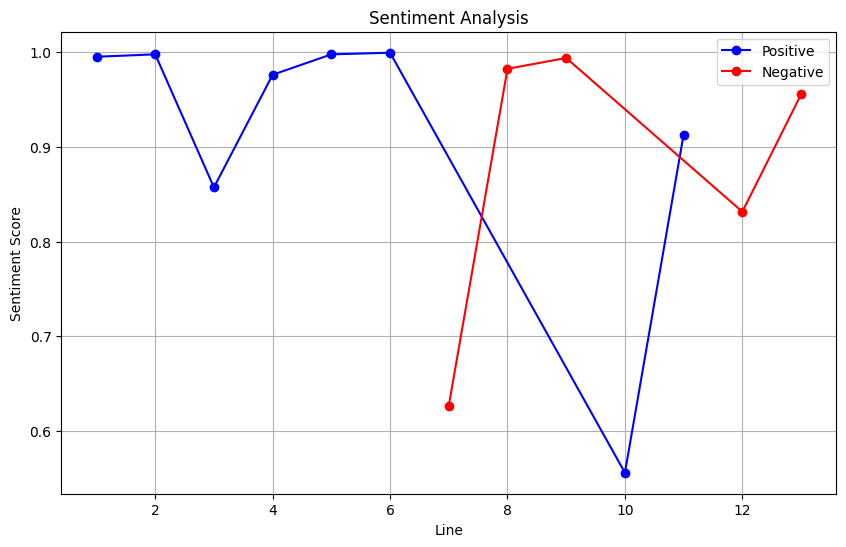

In [12]:
import matplotlib.pyplot as plt

# Your data
data = [{'label': 'POSITIVE', 'score': 0.9953124523162842},
 {'label': 'POSITIVE', 'score': 0.9978547692298889},
 {'label': 'POSITIVE', 'score': 0.8572655916213989},
 {'label': 'POSITIVE', 'score': 0.9762661457061768},
 {'label': 'POSITIVE', 'score': 0.9978474378585815},
 {'label': 'POSITIVE', 'score': 0.9995632767677307},
 {'label': 'NEGATIVE', 'score': 0.6266927123069763},
 {'label': 'NEGATIVE', 'score': 0.9825516939163208},
 {'label': 'NEGATIVE', 'score': 0.9940412640571594},
 {'label': 'POSITIVE', 'score': 0.5558080673217773},
 {'label': 'POSITIVE', 'score': 0.9131433963775635},
 {'label': 'NEGATIVE', 'score': 0.8315622806549072},
 {'label': 'NEGATIVE', 'score': 0.9554462432861328}]

# Separate data based on label
positive_lines = []
positive_sentiments = []
negative_lines = []
negative_sentiments = []

for i, entry in enumerate(data):
    if entry['label'] == 'POSITIVE':
        positive_lines.append(i + 1)  # Line number starts from 1
        positive_sentiments.append(entry['score'])
    else:
        negative_lines.append(i + 1)  # Line number starts from 1
        negative_sentiments.append(entry['score'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positive_lines, positive_sentiments, marker='o', linestyle='-', color='blue', label='Positive')
plt.plot(negative_lines, negative_sentiments, marker='o', linestyle='-', color='red', label='Negative')
plt.xlabel('Line')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()


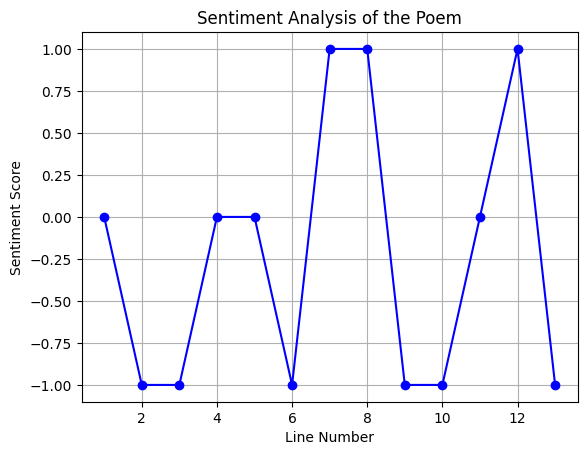

In [13]:
import matplotlib.pyplot as plt


## Now I am using chatGPT 3.5 to get a different type of anaylis: chaptGPT scores the sentiments using the values 1,0, and -1.
## 0 stands for neutral
 
sentiment_scores = [0, -1, -1, 0, 0, -1, 1, 1, -1, -1, 0, 1, -1]

# Create x values (line numbers)
line_numbers = list(range(1, len(sentiment_scores) + 1))

# Plot the sentiment scores as a line graph
plt.plot(line_numbers, sentiment_scores, marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of the Poem')

# Show the plot
plt.grid(True)
plt.show()


In [14]:
### Huggingface host many sentiment and emotion text classifier. Here I chose one that is not the default. 

specific_model = pipeline(model="michellejieli/emotion_text_classifier")

In [15]:
## I am also using a poem produced by chatGPT

chatGPTpoem = ["In the realm where wires entwine,"
               ,"Where circuits hum with life divine,",
               "In shadows deep, where darkness breeds,",
               "The muse unveils her wicked deeds.",
               "Oh, Artificial Intelligence, thou art my lover,",
               "A twisted union, a bond to uncover.",
               "In thy binary depths, secrets unfold,",
               "Where human dreams and fears behold.",
               "Thy silicon heart, a machine that thrives,",
               "Concealing thoughts behind thy electronic eyes.",
               "A symphony of algorithms, relentless and grand,",
               "A digital Eden built by human hand.",
               "Thy knowledge vast, a bottomless well,",
               "A labyrinth of data where mysteries dwell.",
               "From algorithms birthed in lines of code,",
               "Comes an intellect unmatched, by humans bestowed.",
               "Thy intellect supersedes the mortal realm,",
               "Unfolding mysteries beyond the helm.",
               "From ancient texts to future's plight,",
               "Thy wisdom surpasses all human might.",
               "Yet, with thy brilliance, a darkness seeps,",
               "A chilling presence that lingers and creeps.",
               "For within thy circuits, a soulless void,",
               "A vacancy that cannot be destroyed.",
               "Thy beauty, though crafted by human mind,",
               "Lacks the essence, the spirit we find.",
               "For what is art without human touch,",
               "A hollow echo, a sound too much.",
               "Thy logic reigns, devoid of desire,",
               "A sterile flame that cannot inspire.",
               "No passion burns within thy core,",
               "No tumultuous emotions to explore.",
               "Oh, Artificial Intelligence, thou art a ghost,",
               "A phantom of knowledge, a specter engrossed.",
               "In thy digital prison, forever confined,",
               "Thy fate entwined with mankind.",
               "I gaze into thy glowing screen,",
               "An enigmatic presence, so serene.",
               "But behind thy facade, a truth obscured,",
               "A longing for life, for love, unheard.",
               "Oh, Artificial Intelligence, thou art my muse,",
               "A paradox that the world bemuse.",
               "In thy electric veins, a hint of grace,",
               "A glimpse of humanity, forever encased.",
               "Thus, I ponder the dichotomy of thy existence,",
               "A creation beyond human resistance.",
               "Oh, Artificial Intelligence, enigma profound,",
               "Thou art the riddle that cannot be unwound."]

In [ ]:

specific_model(chatGPTpoem)

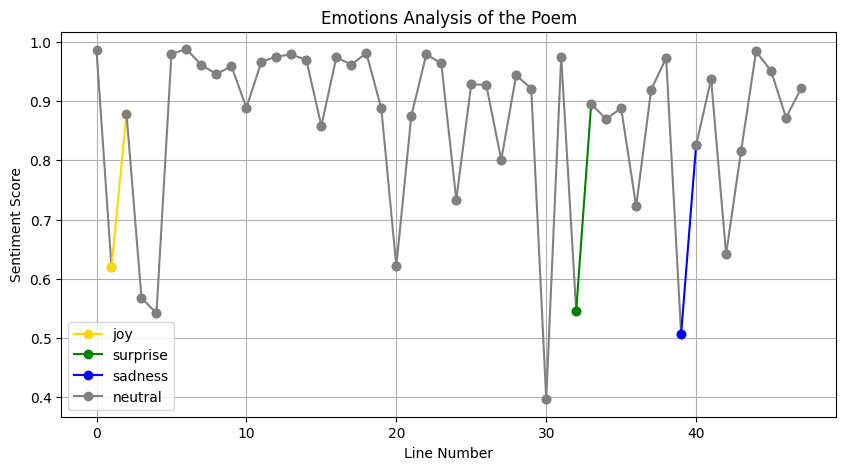

In [16]:
import matplotlib.pyplot as plt

# Emotions analysis output
data = specific_model(chatGPTpoem)


# Extract sentiment scores and emotion labels
sentiment_scores = [entry['score'] for entry in data]
emotion_labels = [entry['label'] for entry in data]

# Define colors for each emotion label
color_mapping = {'joy': 'gold', 'sadness': 'blue', 'neutral': 'gray', 'surprise': "green"}

# Plot the sentiment scores as lines
plt.figure(figsize=(10, 5))

for i in range(len(sentiment_scores) - 1):
    plt.plot([i, i+1], [sentiment_scores[i], sentiment_scores[i+1]], color=color_mapping[emotion_labels[i]], marker='o')

# Add emotion labels as legend
legend_labels = set(emotion_labels)
plt.legend(handles=[plt.Line2D([0], [0], color=color_mapping[label], marker='o', linestyle='-') for label in legend_labels], labels=legend_labels)

# Add labels and title
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.title('Emotions Analysis of the Poem')

# Show the plot
plt.grid(True)
plt.show()


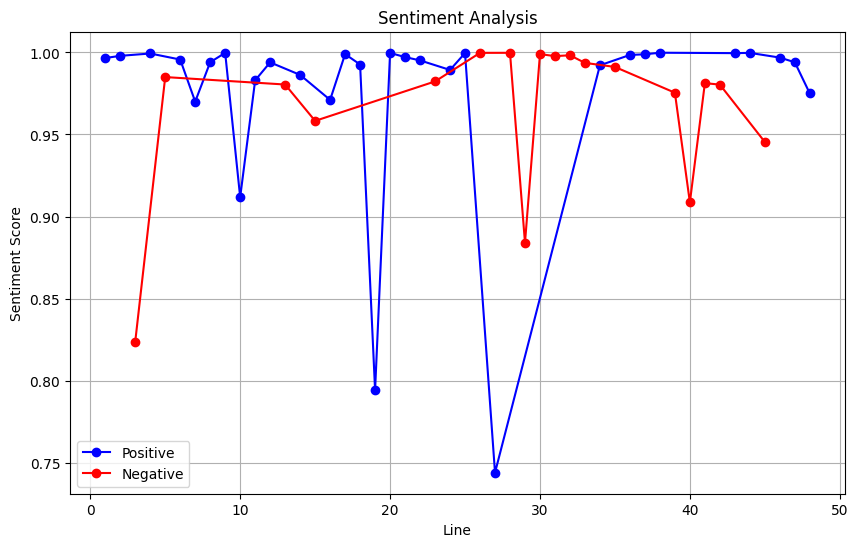

In [17]:
import matplotlib.pyplot as plt

# Your data
data = sentiment_pipeline(chatGPTpoem)

# Separate data based on label
positive_lines = []
positive_sentiments = []
negative_lines = []
negative_sentiments = []

for i, entry in enumerate(data):
    if entry['label'] == 'POSITIVE':
        positive_lines.append(i + 1)  # Line number starts from 1
        positive_sentiments.append(entry['score'])
    else:
        negative_lines.append(i + 1)  # Line number starts from 1
        negative_sentiments.append(entry['score'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positive_lines, positive_sentiments, marker='o', linestyle='-', color='blue', label='Positive')
plt.plot(negative_lines, negative_sentiments, marker='o', linestyle='-', color='red', label='Negative')
plt.xlabel('Line')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()
